In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Adjust default font size so that labels are readable in plots
import matplotlib
font = {'size': 15}
matplotlib.rc('font', **font)

# Uncertainty Estimate of Success Rate

Question: Out of N times of experiments, K of them successed. What is the success rate $\rho$ and what is the uncertainty $\sigma_P$ on the esimation ?


We know that given probability $\rho$, what the pdf distribution of all results in N experiments:
$$
P(K|N,\rho) = C_N^K \rho^K \left( 1- \rho \right)^{N-k}
$$

In [3]:
### Generate a random number between 0-1
rdn = np.random.ranf(1)
print('Here is a random number between 0 to 1:')
print(rdn)

Here is a random number between 0 to 1:
[0.50633207]


In [4]:
### Generate N random number between 0-1
N, M = 5, 10   #define N; and the repeat number for the experiments

rnds = np.random.random([10, 5])
print(rnds)

[[0.95816366 0.10247703 0.4066532  0.82408025 0.43345477]
 [0.64825286 0.24553863 0.3119955  0.76031533 0.37186976]
 [0.82954796 0.48504085 0.73804717 0.67632584 0.81953702]
 [0.29674647 0.05862083 0.46205852 0.08906741 0.05434249]
 [0.86247379 0.92155974 0.16091073 0.80389356 0.56249188]
 [0.19894807 0.05221145 0.7752884  0.90675112 0.78519777]
 [0.389526   0.47740322 0.68617222 0.37809094 0.97006624]
 [0.5798288  0.8408165  0.36626901 0.97049865 0.85404209]
 [0.92653855 0.50786798 0.28098066 0.35409425 0.84014052]
 [0.11055427 0.69615526 0.69849144 0.36412752 0.54970969]]


In [5]:
### Now simulate the experiment with a success rate:
rho = 0.6

print('For the first set:', rnds[0])
print('The sucess/fail :', rnds[0]<rho)
print('Number of success:', np.sum(rnds[0]<rho) ,'\n')

print('Now for all the experiment trials, success or fail:')
print(rnds<rho)
print('Success counts of each set:', np.sum(rnds<rho, axis=1))

For the first set: [0.95816366 0.10247703 0.4066532  0.82408025 0.43345477]
The sucess/fail : [False  True  True False  True]
Number of success: 3 

Now for all the experiment trials, success or fail:
[[False  True  True False  True]
 [False  True  True False  True]
 [False  True False False False]
 [ True  True  True  True  True]
 [False False  True False  True]
 [ True  True False False False]
 [ True  True False  True False]
 [ True False  True False False]
 [False  True  True  True False]
 [ True False False  True  True]]
Success counts of each set: [3 3 1 5 2 2 3 2 3 3]


(0, 5)

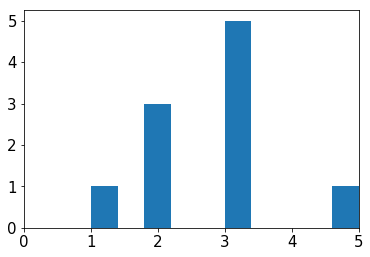

In [6]:
### plot the result of the experiments:

plt.hist(np.sum(rnds<rho, axis=1))
plt.xlim([0,N])

In [7]:
### write a experiment package
def experiment(n_trials=5, M_exp=20, rho=1.0):
    import scipy.special as sp
    
    ### run the experiment and plot results
    rand_sam = np.random.random([M_exp, n_trials])
    n_sucess = np.sum(rand_sam<rho, axis=1)
    plt.hist(n_sucess, density=1, align='left', bins=range(n_trials+2), label='Test results')
    plt.xlabel('Number of success')
    plt.ylabel('Probability')
    
    ### add binomial prediction
    x_model = np.linspace(0, n_trials, n_trials+1)
    y_model = sp.binom(n_trials, x_model) *rho**x_model *(1.0-rho)**(n_trials-x_model)
    plt.plot(x_model, y_model, 'ro', label='Binomial') 
    plt.legend()
    plt.show()
    
    return n_sucess

## Binomial Distribution
$$
    f(k,n,p) = \binom{n}{k} p^k (1-p)^{n-k} 
    = \frac{n!}{k!(n-k)!} p^k (1-p)^{n-k} 
$$

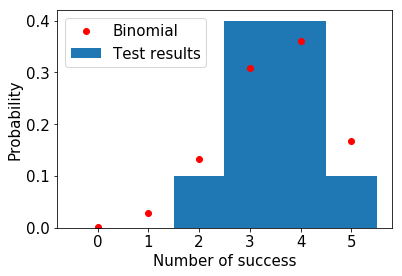

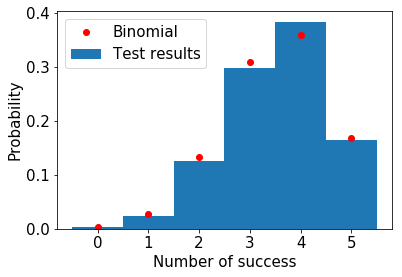

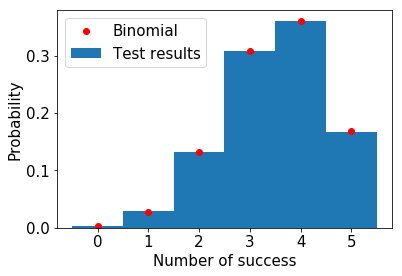

In [8]:
### Showing the result of 10, 1000 and 100,000 experiment
n_sucess10 = experiment(5, 10, 0.7)
n_sucess1k = experiment(5, 1000, 0.7)
n_sucess1M = experiment(5, 1000000, 0.7)

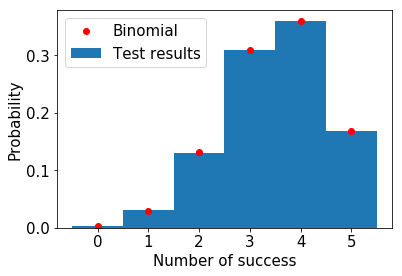

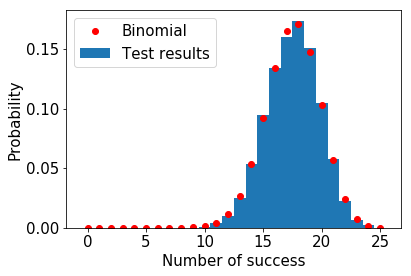

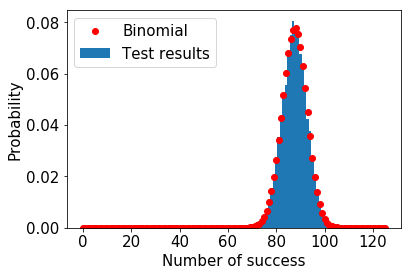

In [9]:
### compare the experiment with trial number of 5, 25 and 125 (10k repeat)
n_s5 = experiment(5, 10000, 0.7)
n_s25 = experiment(25, 10000, 0.7)
n_s125 =experiment(125, 10000, 0.7)

### Effect from the success rate

Now come back to the main topic. 
Given N trials and a result of K sucess. What is the probability distribution of the sucess rate?

First, let's compare the impact of different $\rho$ input to the outcome distribution.

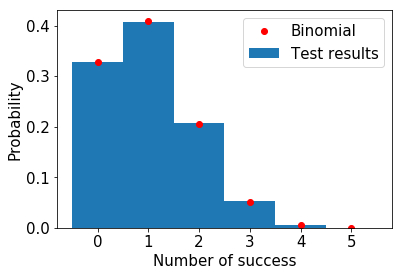

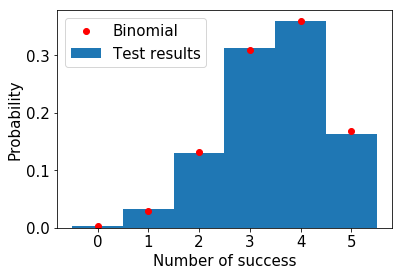

In [10]:
### compare the test result of two different success rate. 

N_rho_02 = experiment(5, 10000, 0.2)
N_rho_07 = experiment(5, 10000, 0.7)

For 5 trial, compare the result distributions with 9 assumed sucess rate, from 0.1, 0.2 ... to 0.9:

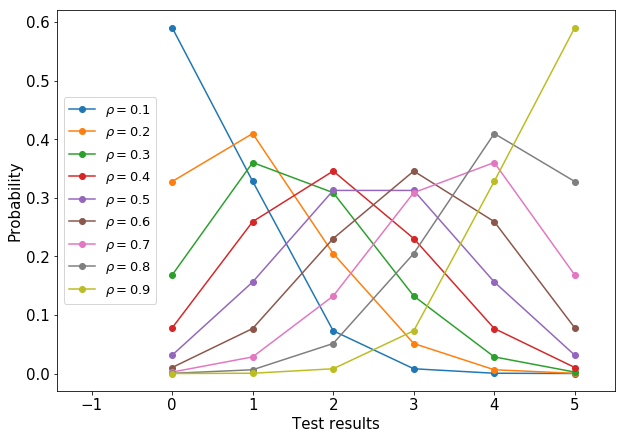

In [11]:
### Compare expectation of multiple rho in the same experiment (same trial number)
def compare_rho(rho_s, n_trials = 5):
    import scipy.special as sp
    
    ax = plt.subplots( figsize=(10,7))
    plt.xlabel('Test results')
    plt.ylabel('Probability')
    x_model = np.linspace(0, n_trials, n_trials+1)
    for rho_i in rho_s:
        y_model = sp.binom(n_trials, x_model) *rho_i**x_model *(1.0-rho_i)**(n_trials-x_model)
        plt.plot(x_model, y_model, '-o',label=r'$\rho=${:3.1f}'.format(rho_i))
    
    plt.legend(loc='center left',fontsize=13)
    plt.xlim(-n_trials/3.5, 1.1*n_trials)
    plt.show()
    return 0

plt_rhos = compare_rho(np.arange(0.1,1.0, 0.1))

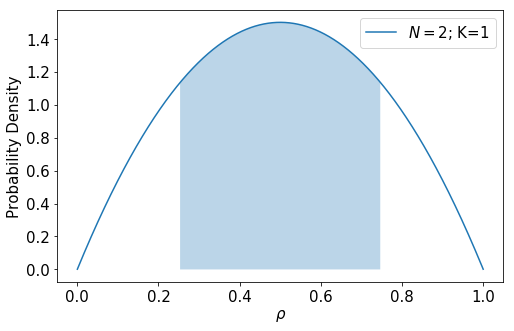

The best estimate: 0.500; with 1-sigma range of 0.253--0.746


In [38]:
### 

def rho_dist(n_trials, k_success): 
    import scipy.special as sp
    
    ## define the differential length in rho
    d_rho = 0.0005
    rho_s = np.arange(0,1.0, d_rho) + d_rho/2.0
    #x_model = np.linspace(0, n_trials, n_trials+1)
    prob = sp.binom(n_trials, k_success) * rho_s **k_success *(1.0-rho_s)**(n_trials-k_success)
    # normalize prob:
    n_prob = prob / np.sum(prob*d_rho)
    ## finding the rho with maximum prob:
    rho_bst = rho_s[np.argmax(n_prob)]
    ## cumulative prob:
    cn_prob = np.cumsum(n_prob*d_rho)
    ## finding the one sigma range:
    loc_1sig = (cn_prob>0.16) & (cn_prob<0.84)
    rho_1sig = rho_s[loc_1sig] 
    rho_l68, rho_h68 = rho_1sig[0], rho_1sig[-1]
    
    ## set up the figure
    ax = plt.subplots(figsize=(8,5))
    plt.xlabel(r'$\rho$')
    plt.ylabel('Probability Density')
    
    plt.plot(rho_s, n_prob,label=r'$N=${:}; K={:}'.format(n_trials,k_success))
    plt.fill_between(rho_1sig, 0, n_prob[loc_1sig], alpha=0.3)
    plt.legend()
    plt.show()
    return [rho_bst, rho_l68, rho_h68]

rho_bst, rho_l, rho_h = rho_dist(2, 1)
print(r'The best estimate: {:4.2f}; with 1-sigma range of {:4.2f}--{:4.2f}'.format(rho_bst, rho_l, rho_h))

## More Examples
* Launch 20 times, with 10 of them being success
* SpaceX's current record for Falcon 9 launches: 70 success out of 72 total launches. 

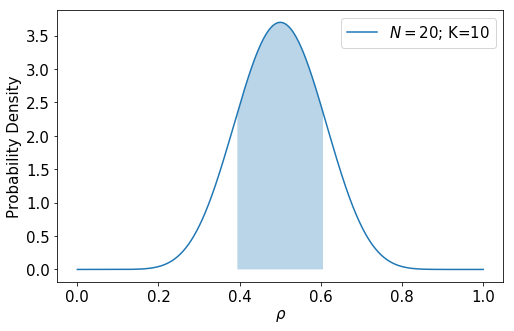

The best estimate: 0.50; with 1-sigma range of 0.39--0.61


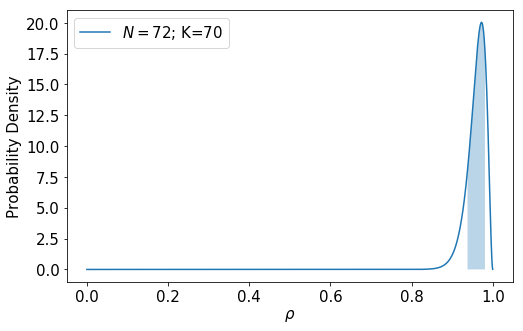

The best estimate: 0.972; with 1-sigma range of 0.938--0.981


In [40]:
### another two example
rho_bst, rho_l, rho_h = rho_dist(20, 10)
print(r'The best estimate: {:4.2f}; with 1-sigma range of {:4.2f}--{:4.2f}'.format(rho_bst, rho_l, rho_h))

rho_bst, rho_l, rho_h = rho_dist(72, 70)
print(r'The best estimate: {:5.3f}; with 1-sigma range of {:5.3f}--{:5.3f}'.format(rho_bst, rho_l, rho_h))